<a href="https://colab.research.google.com/github/mounicasatraboina/-MOUNICA_INFO5731_Fall2021/blob/main/INFO5731_Assignment_Four_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [ ]:
!pip install pyLDAvis 
!pip install ipympl
%matplotlib ipympl
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk

In [ ]:
nltk.download('stopwords')
stop = set(nltk.corpus.stopwords.words('english'))
# stop = stopwords.words('english')
tokenizer = RegexpTokenizer(r'\w+')
p_stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

In [ ]:
data = pd.read_csv("IMDBreviews.csv",encoding='ISO-8859-1')
data_df.head(20)

AttributeError: ignored

    Document_Id  ... Sentiment
0           1.0  ...  Positive
1           2.0  ...   Neutral
2           3.0  ...  Positive
3           4.0  ...  Positive
4           5.0  ...  Negative
5           6.0  ...  Positive
6           7.0  ...  Positive
7           8.0  ...  Positive
8           9.0  ...   Netural
9          10.0  ...  Positive
10         11.0  ...   Netural
11         12.0  ...  Positive
12         13.0  ...  Positive
13         14.0  ...  Positive
14         15.0  ...   Netural
15         16.0  ...   Netural
16         17.0  ...  Negative
17         18.0  ...   Netural
18         19.0  ...  Negative
19         20.0  ...   Netural

[20 rows x 83 columns]

In [ ]:
from nltk.corpus import stopwords
from textblob import TextBlob
data['Lower Case'] = data['CleanData'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
data['Tokenization'] = data['Lower Case'].apply(lambda x: tokenizer.tokenize(x))
data['Stemming'] = data['Tokenization'].apply(lambda x: [p_stemmer.stem(i) for i in x])

In [ ]:
text = []
for line in data['Stemming']:
  text.append(line)

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [ ]:
from gensim import corpora, models
bigram = models.Phrases(text, min_count=5, threshold=100)
trigram = models.Phrases(bigram[text], threshold=100)
bigram_mod = models.phrases.Phraser(bigram)
trigram_mod = models.phrases.Phraser(trigram)
print(trigram_mod[bigram_mod[matter[0]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['c', 'o', 'u', 'r', 's', 'e', 'i', 'r', 't', 'e', 'a', 's', 'a', 'k', 'n', 'g', 'c', 'e', 'r', 't', 'a', 'i', 'n', 't', 'h', 'i', 'n', 'g', 's', 's', 'a', 'r', 'y', 'l', 'i', 'n', 'e', 't', 'h', 'o', 'u', 'g', 'h', 't', 'r', 'u', 't', 'h', 'e', 's', 'p', 'e', 'c', 'l', 'l', 'y', 'c', 'o', 'n', 's', 'i', 'd', 'e', 'r', 'l', 'a', 's', 't', 't', 'h', 'i', 'r', 'd', 'm', 'o', 'v', 'e', 'u', 'i', 't', 'e', 'n', 't', 'a', 's', 't', 'c', 'l', 'p', 'u', 'n', 'i', 'n', 't', 'e', 'n', 'd', 'e', 'd', 'b', 'u', 't', 'm', 'h', 'a', 'n', 'd', 'm', 'a', 'y', 's', 'e', 'e', 'b', 'u', 's', 'e', 'n', 'e', 'l', 'r', 'e', 'a', 'd', 'y', 'm', 'g', 'i', 'n', 'e', 'y', 't', 'i', 'm', 'e', 's', 's', 't', 'i', 't', 'e', 'h', 'g', 'h', 'l', 'g', 'h', 't', 'w', 'o', 'r', 'k', 's', 'w', 'o', 'n', 'd', 'e', 'r', 's', 'b', 'e', 'c', 'a', 'u', 's', 'e', 'e', 'v', 'e', 'n', 't', 'r', 'a', 'l', 'e', 'r', 't', 'e', 'a', 's', 'e', 'r', 'r', 'e', 'v', 'e', 'a', 'l', 'e', 'd', 'a', 's', 'p', 'l', 'o', 't', 'c', 'h', 'a',

In [ ]:
def make_bigrams(matter):
    return [bigram_mod[doc] for doc in text]

def make_trigrams(matter):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

import spacy
data_words_bigrams = make_bigrams(matter)
nlp = spacy.load('en', disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

[['c', 'o', 'u', 'r', 's', 'e', 'i', 'r', 't', 'e', 'a', 's', 'a', 'k', 'n', 'g', 'c', 'e', 'r', 't', 'a', 'i', 'n', 't', 'h', 'i', 'n', 'g', 's', 's', 'a', 'r', 'y', 'l', 'i', 'n', 'e', 't', 'h', 'o', 'u', 'g', 'h', 't', 'r', 'u', 't', 'h', 'e', 's', 'p', 'e', 'c', 'l', 'l', 'y', 'c', 'o', 'n', 's', 'i', 'd', 'e', 'r', 'l', 'a', 's', 't', 't', 'h', 'i', 'r', 'd', 'm', 'o', 'v', 'e', 'u', 'i', 't', 'e', 'n', 't', 'a', 's', 't', 'c', 'l', 'p', 'u', 'n', 'i', 'n', 't', 'e', 'n', 'd', 'e', 'd', 'b', 'u', 't', 'm', 'h', 'a', 'n', 'd', 'm', 'a', 'y', 's', 'e', 'e', 'b', 'u', 's', 'e', 'n', 'e', 'l', 'r', 'e', 'a', 'd', 'y', 'm', 'g', 'i', 'n', 'e', 'y', 't', 'i', 'm', 'e', 's', 's', 't', 'i', 't', 'e', 'h', 'g', 'h', 'l', 'g', 'h', 't', 'w', 'o', 'r', 'k', 's', 'w', 'o', 'n', 'd', 'e', 'r', 's', 'b', 'e', 'c', 'a', 'u', 's', 'e', 'e', 'v', 'e', 'n', 't', 'r', 'a', 'l', 'e', 'r', 't', 'e', 'a', 's', 'e', 'r', 'r', 'e', 'v', 'e', 'a', 'l', 'e', 'd', 'a', 's', 'p', 'l', 'o', 't', 'c', 'h', 'a'

In [ ]:
id2word = corpora.Dictionary(data_lemmatized)#For dictionary and corpus
matter = data_lemmatized
corpus = [id2word.doc2bow(text) for text in matter]
print(corpus[:1])

[[(0, 59), (1, 13), (2, 41), (3, 32), (4, 142), (5, 5), (6, 25), (7, 37), (8, 59), (9, 7), (10, 50), (11, 34), (12, 66), (13, 55), (14, 19), (15, 1), (16, 60), (17, 75), (18, 84), (19, 19), (20, 17), (21, 12), (22, 1), (23, 19)]]


In [ ]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('a', 59),
  ('b', 13),
  ('c', 41),
  ('d', 32),
  ('e', 142),
  ('f', 5),
  ('g', 25),
  ('h', 37),
  ('i', 59),
  ('k', 7),
  ('l', 50),
  ('m', 34),
  ('n', 66),
  ('o', 55),
  ('p', 19),
  ('q', 1),
  ('r', 60),
  ('s', 75),
  ('t', 84),
  ('u', 19),
  ('v', 17),
  ('w', 12),
  ('x', 1),
  ('y', 19)]]

In [ ]:
lda_model = models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics = 20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.058*"crap" + 0.029*"that" + 0.029*"unprofession" + 0.001*"e" + 0.001*"o" '
  '+ 0.001*"r" + 0.001*"n" + 0.001*"s" + 0.001*"t" + 0.001*"i"'),
 (1,
  '0.147*"e" + 0.085*"o" + 0.077*"t" + 0.069*"n" + 0.068*"r" + 0.060*"l" + '
  '0.059*"s" + 0.051*"i" + 0.045*"a" + 0.043*"h"'),
 (2,
  '0.132*"e" + 0.100*"o" + 0.082*"a" + 0.082*"s" + 0.071*"t" + 0.071*"r" + '
  '0.058*"m" + 0.056*"n" + 0.046*"i" + 0.038*"h"'),
 (3,
  '0.001*"e" + 0.001*"t" + 0.001*"r" + 0.001*"a" + 0.001*"l" + 0.001*"o" + '
  '0.001*"s" + 0.001*"n" + 0.001*"h" + 0.001*"c"'),
 (4,
  '0.170*"e" + 0.098*"s" + 0.096*"t" + 0.078*"n" + 0.072*"r" + 0.068*"i" + '
  '0.057*"a" + 0.045*"l" + 0.042*"c" + 0.038*"h"'),
 (5,
  '0.035*"movi" + 0.031*"marvel" + 0.024*"film" + 0.021*"charact" + '
  '0.020*"stori" + 0.019*"go" + 0.019*"time" + 0.018*"most" + 0.018*"watch" + '
  '0.016*"action"'),
 (6,
  '0.023*"well" + 0.020*"breath" + 0.020*"strategi" + 0.020*"composit" + '
  '0.020*"flow" + 0.020*"transit" + 0.020*"ballet" + 0.02

In [ ]:
from gensim.models import CoherenceModel
print('\nPerplexity: ', lda_model.log_perplexity(corpus))
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -3.054124825916281

Coherence Score:  0.40676859729545767


In [ ]:
!pip install pyLDAvis


In [ ]:
from pprint import pprint
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
# spacy for lemmatization
import spacy
# Plotting tools
import pyLDAvis

import matplotlib.pyplot as plt
%matplotlib inline
# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#LSA MODEL
lsamodel = models.LsiModel(corpus, num_topics = 20, id2word = id2word)

pprint(lsamodel.print_topics(num_topics = 20))

[(0,
  '0.550*"e" + 0.336*"t" + 0.302*"s" + 0.287*"r" + 0.260*"n" + 0.252*"o" + '
  '0.242*"a" + 0.214*"i" + 0.198*"l" + 0.180*"c"'),
 (1,
  '0.504*"e" + -0.454*"r" + -0.342*"s" + 0.311*"m" + -0.296*"a" + 0.247*"v" + '
  '0.231*"o" + -0.224*"n" + -0.137*"u" + 0.100*"p"'),
 (2,
  '-0.459*"t" + -0.428*"l" + 0.422*"o" + 0.394*"s" + -0.364*"i" + 0.151*"p" + '
  '-0.145*"b" + 0.131*"e" + 0.117*"a" + -0.116*"n"'),
 (3,
  '0.601*"o" + -0.452*"e" + -0.360*"n" + 0.271*"l" + 0.200*"t" + -0.180*"s" + '
  '0.153*"r" + 0.152*"a" + 0.119*"b" + -0.117*"i"'),
 (4,
  '-0.604*"s" + -0.371*"t" + 0.367*"n" + 0.331*"r" + -0.225*"p" + -0.214*"l" + '
  '-0.179*"u" + 0.152*"c" + 0.151*"a" + 0.116*"o"'),
 (5,
  '0.443*"n" + -0.410*"r" + 0.371*"g" + 0.352*"o" + -0.282*"c" + 0.229*"i" + '
  '0.229*"y" + -0.220*"a" + -0.217*"e" + 0.188*"s"'),
 (6,
  '0.448*"a" + 0.419*"m" + -0.380*"t" + 0.361*"i" + -0.244*"r" + 0.220*"l" + '
  '-0.218*"y" + -0.197*"e" + 0.173*"s" + -0.170*"d"'),
 (7,
  '0.487*"h" + -0.400*"l" + 0

/usr/local/lib/python3.7/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
/usr/local/lib/python3.7/dist-packages/gensim/topic_coherence/indirect_confirmation_measure.py:317: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


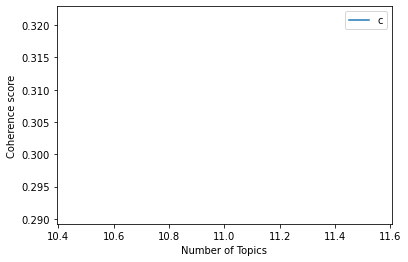

In [ ]:
coherence_values = []
model_list = []
for num_topics in range(2, 12, 1):
  model = models.LsiModel(corpus, num_topics = 20, id2word = id2word)
  model_list.append(model)
  coherencemodel = CoherenceModel(model= model, texts = data['Stemming'], dictionary = id2word, coherence='c_v')
  coherence_values.append(coherencemodel.get_coherence())

x = range(2, 12, 1)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [ ]:
# Write your code here
import seaborn as sns


# Count the sentiment count
sentiment_count = data['CleanData'].value_counts()
print(sentiment_count)




f o r f i r s t t i m e c o u p l e y e a r s s i n c e c a p t a i n m a r v e l m c u i n t r o d u c e s u s b r a n d n e w h e r o s i m u l i u r a t h e r i m p r e s s i v e l y f i r s t a s k e d r o l e t w i t t e r b r i n g s u s s h a n g c h i f i l m p e r h a p s i s s u e s e n d i n g u l t i m a t e l y f u n f u n n y r i d e t y p e m a r v e l p e r f e c t i n g l a s t y e a r s t a l e n t e d s o m e w h a t a i m l e s s s h a u n s i m u l i u l i v e s s a n f r a n c i s c o w o r k i n g v a l e t f r i e n d k a t y a w k w a f i n a w h e n a t t a c k e d b u s f o r c e d b a c k w o r l d f a t h e r r u t h l e s s t e r r o r i s t x u w e n w u t o n y c h i u w a i l e u n g f i r s t v i s i t i n g s i s t e r r e t u r n i n g t e n r i n g s c o m p o u n d s h a n g c h i d e c i d e s u s e s k i l l s d e f e n d l a t e m o t h e r s s a c r e d h o m e l a n d i n v a s i o n f a t h e r c o n t r o l t e n m y s t i c a l a r m r i n 

In [304]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn import model_selection
from sklearn import naive_bayes

# defining feature
tfidf_vect = TfidfVectorizer()
encoder = LabelEncoder()
x = tfidf_vect.fit_transform(data['CleanData'].values)

# Splitting data into training and testing data
xtrain, xvalid, ytrain, yvalid = model_selection.train_test_split(x, data['Sentiment'],test_size=0.2)

def training_model(model_intializer):
  model = model_intializer
  model.fit(xtrain, ytrain)
  predicted = model.predict(xvalid)
  accuracy = accuracy_score(yvalid, predicted)
  print("Accuracy of Traning data: {0}".format(accuracy))
  print(classification_report(yvalid, predicted))

# Naive-Bayes
training_model(naive_bayes.MultinomialNB())

ValueError: ignored

In [305]:
# SVM
training_model(svm.SVC())

ValueError: ignored

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731_spring2021/blob/main/assignment/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [286]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (1).csv


In [287]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [288]:
# Write your code here

import pandas as pd
train = pd.read_csv('/content/test.csv')
validation = pd.read_csv('/content/train.csv')

In [289]:
train.describe()

AttributeError: ignored

                Id   MSSubClass  ...       MoSold       YrSold
count  1459.000000  1459.000000  ...  1459.000000  1459.000000
mean   2190.000000    57.378341  ...     6.104181  2007.769705
std     421.321334    42.746880  ...     2.722432     1.301740
min    1461.000000    20.000000  ...     1.000000  2006.000000
25%    1825.500000    20.000000  ...     4.000000  2007.000000
50%    2190.000000    50.000000  ...     6.000000  2008.000000
75%    2554.500000    70.000000  ...     8.000000  2009.000000
max    2919.000000   190.000000  ...    12.000000  2010.000000

[8 rows x 37 columns]

In [290]:
print(train.isnull().sum())

validation.describe()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


AttributeError: ignored

                Id   MSSubClass  ...       YrSold      SalePrice
count  1460.000000  1460.000000  ...  1460.000000    1460.000000
mean    730.500000    56.897260  ...  2007.815753  180921.195890
std     421.610009    42.300571  ...     1.328095   79442.502883
min       1.000000    20.000000  ...  2006.000000   34900.000000
25%     365.750000    20.000000  ...  2007.000000  129975.000000
50%     730.500000    50.000000  ...  2008.000000  163000.000000
75%    1095.250000    70.000000  ...  2009.000000  214000.000000
max    1460.000000   190.000000  ...  2010.000000  755000.000000

[8 rows x 38 columns]

In [291]:
print(validation.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


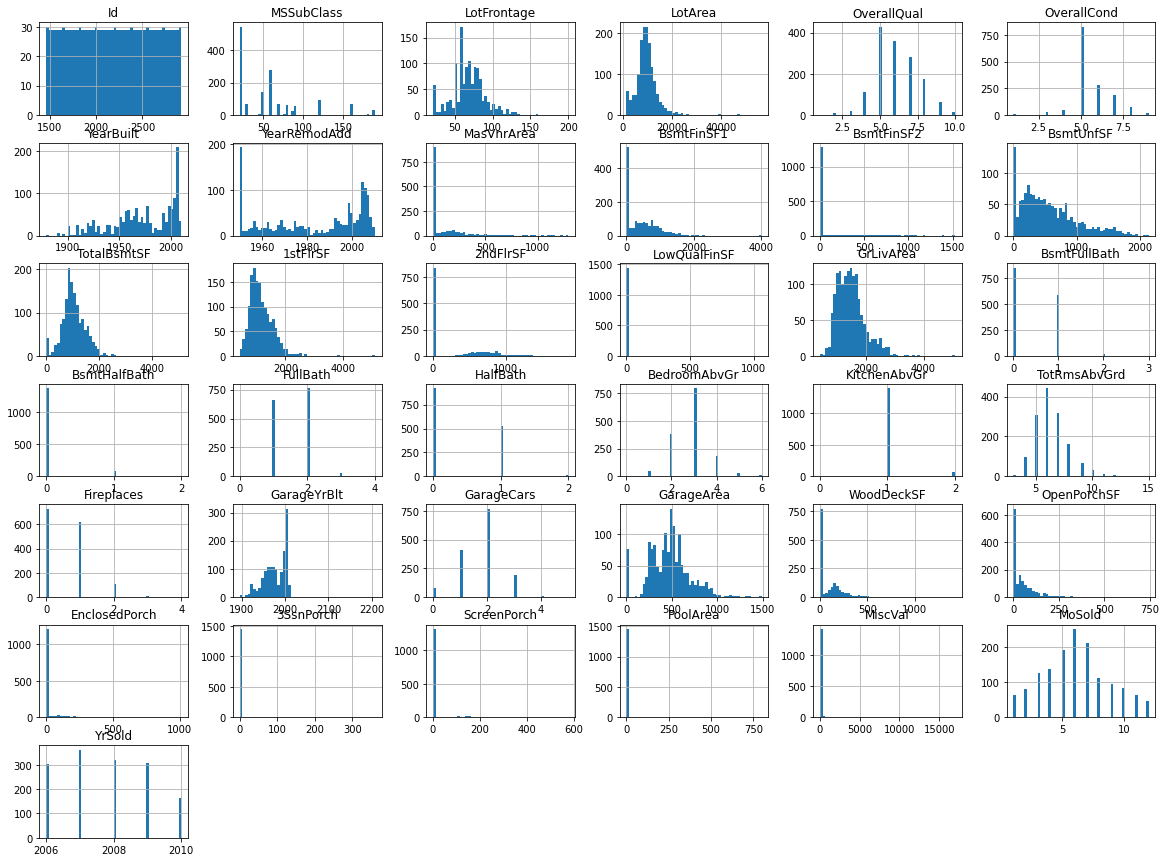

In [292]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

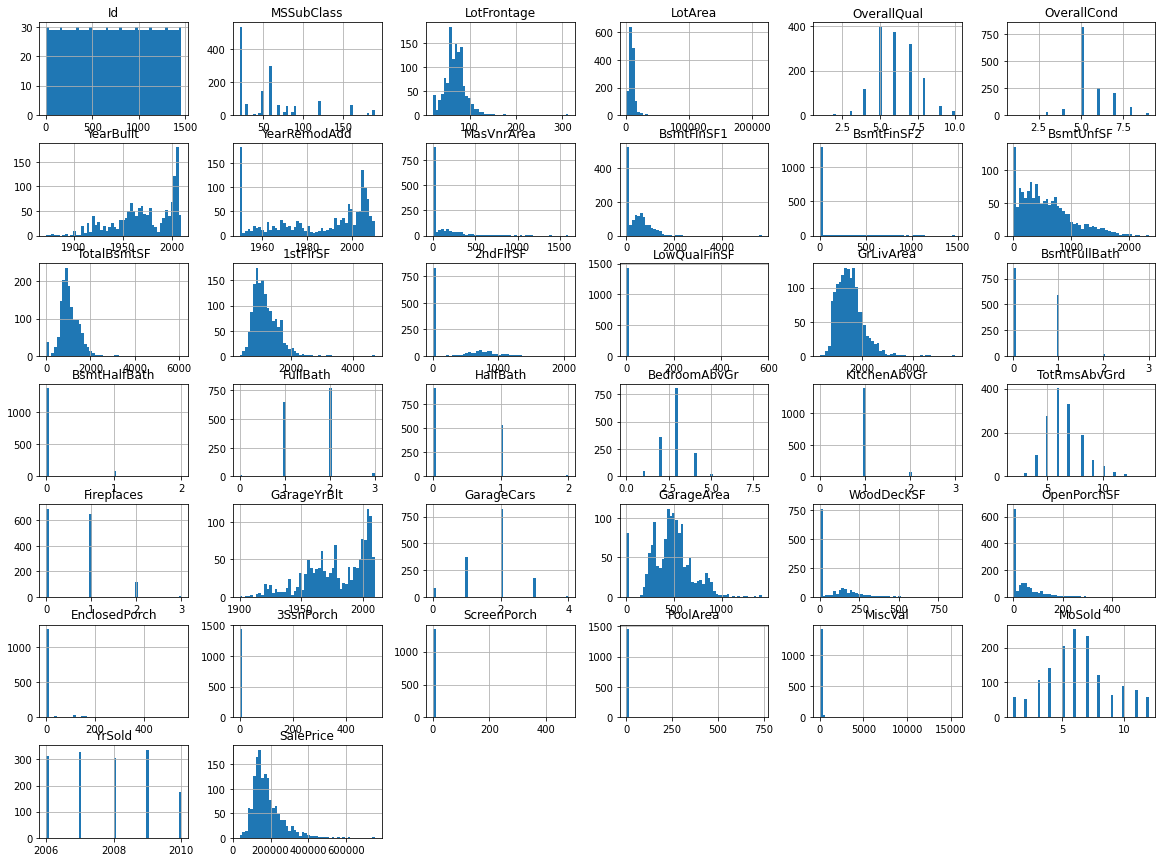

In [293]:
validation.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [294]:
corr_matrix = train.corr()
corr_matrix["YrSold"].sort_values(ascending=False)

YrSold           1.000000
KitchenAbvGr     0.038614
BsmtFinSF1       0.030779
YearRemodAdd     0.029715
3SsnPorch        0.027818
LowQualFinSF     0.026864
BsmtFullBath     0.023824
OverallCond      0.015649
HalfBath         0.013504
MiscVal          0.011829
FullBath         0.010283
Fireplaces       0.010002
EnclosedPorch    0.007616
BsmtHalfBath     0.006073
GarageArea       0.000536
BedroomAbvGr    -0.005113
GarageCars      -0.007032
TotalBsmtSF     -0.007817
MSSubClass      -0.008392
GarageYrBlt     -0.008451
2ndFlrSF        -0.010098
YearBuilt       -0.011006
BsmtFinSF2      -0.011749
OverallQual     -0.012291
1stFlrSF        -0.013566
OpenPorchSF     -0.017122
GrLivArea       -0.017434
WoodDeckSF      -0.022818
ScreenPorch     -0.023439
LotFrontage     -0.025263
MasVnrArea      -0.029556
TotRmsAbvGrd    -0.031627
BsmtUnfSF       -0.035214
PoolArea        -0.045185
LotArea         -0.051144
MoSold          -0.163924
Id              -0.974884
Name: YrSold, dtype: float64

In [295]:
train.plot(kind="scatter", x="OverallQual", y="YrSold", alpha=0.5)

ImportError: ignored

In [296]:
train.plot(kind="scatter", x="GrLivArea", y="YrSold", alpha=0.5)

ImportError: ignored

In [297]:
import numpy as np
train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [298]:
train.fillna(999, inplace=True)

In [299]:
#Train and build the regression model

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import LabelEncoder
columns = ('GarageCond', 'LandContour', 'RoofStyle', 'RoofMatl', 'Heating', 'MiscFeature', 'SaleType', 'GarageType', 'Electrical', 'SaleCondition', 'Foundation', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'FireplaceQu', 'LotShape', 'Neighborhood', 'Condition1', 'Condition2', 'Utilities', 'BldgType', 'HouseStyle','PoolQC', 'BsmtQual', 'BsmtCond', 'GarageQual','BsmtExposure', 'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1','BsmtFinType2', 'Functional', 'Fence', 'GarageFinish', 'LandSlope','LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold', 'MSZoning','LotConfig')
for i in columns:
    encoder = LabelEncoder()
    encoder.fit(list(train[i].values))
    train[i] = encoder.transform(list(train[i].values))
for j in columns:
    encoder_test = LabelEncoder()
    encoder_test.fit(list(validation[j].values))
    validation[j] = encoder_test.transform(list(validation[j].values))

x_train = train[train.columns[:80]]
y_train = train['YrSold']
x_validation = validation[validation.columns[:80]]

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [301]:
import numpy as np
train.replace([np.inf, -np.inf], np.nan, inplace=True)
train.fillna(999, inplace=True)

In [300]:
regressor.predict(x_train)

array([4.00000000e+00, 4.00000000e+00, 4.00000000e+00, ...,
       8.45079590e-14, 4.57508265e-13, 1.63556835e-13])